In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import  roc_curve, auc, classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

In [10]:
# Load pre-processed data
FMG_CRC_BA = pd.read_csv("FMG_CRC_BA.csv", delimiter=",")
FMG_CRC_BA

,g__Acetanaerobacterium,g__Acetatifactor,g__Acetivibrio,g__Acidaminococcus,g__Actinobacillus,g__Actinomyces,g__Adlercreutzia,g__Aggregatibacter,g__Alistipes,g__Alkalitalea,...,g__Zobellella,g__Zoogloea,Group,Stage,Age,Gender,BMI,Brinkman Index,Alcohol,Tumor location
0,0.000016,0.000158,0.000519,0.000093,0.000051,0.000251,0.000856,0.000018,0.000000,0.000007,...,0.000040,0.000043,Healthy,-,65,M,26.5625,660,0,-
1,0.000253,0.000012,0.000380,0.002880,0.000033,0.000270,0.000492,0.000002,0.003794,0.000000,...,0.000021,0.000000,Healthy,-,40,M,25,400,993,-
2,0.000375,0.000000,0.000462,0.000072,0.000000,0.000132,0.000568,0.000002,0.003503,0.000000,...,0.000053,0.000024,Healthy,-,67,F,20.17325264,0,0,-
3,0.000003,0.000032,0.000079,0.002272,0.001376,0.000160,0.000273,0.000682,0.003374,0.000000,...,0.000088,0.000012,Healthy,-,77,M,24.4646016,300,813,-
4,0.000007,0.000026,0.000646,0.000429,0.000000,0.000219,0.000051,0.000000,0.000926,0.000051,...,0.000075,0.000000,Healthy,-,64,F,21.1552942,0,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,0.000053,0.000000,0.000279,0.000027,0.000000,0.000082,0.000447,0.000000,0.008111,0.000009,...,0.000000,0.000014,HS,-,51,F,18.08021039,90,669.9,-
612,0.000178,0.000003,0.000189,0.003788,0.000198,0.000067,0.000000,0.000014,0.044267,0.000018,...,0.000000,0.000000,HS,Normal,42,F,17.94181725,110,120,-
613,0.000022,0.000028,0.000012,0.000000,0.000047,0.000281,0.000000,0.000000,0.000000,0.000000,...,0.000164,0.000000,HS,-,70,F,20.504934,0,18.26,-
614,0.000000,0.000020,0.000122,0.000018,0.000011,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000008,0.000000,HS,-,65,F,27.09925101,0,73.6929,-


In [11]:
stage_mapping = { # Map all different stages into group 'CRC patients'
    'Stage_0': 'CRC',
    'Stage_I_II': 'CRC',
    'Stage_III_IV': 'CRC',
    'MP': 'CRC',
    'HS': 'CRC',
}

FMG_CRC_BA['Group'] = FMG_CRC_BA['Group'].replace(stage_mapping)
FMG_CRC_BA

,g__Acetanaerobacterium,g__Acetatifactor,g__Acetivibrio,g__Acidaminococcus,g__Actinobacillus,g__Actinomyces,g__Adlercreutzia,g__Aggregatibacter,g__Alistipes,g__Alkalitalea,...,g__Zobellella,g__Zoogloea,Group,Stage,Age,Gender,BMI,Brinkman Index,Alcohol,Tumor location
0,0.000016,0.000158,0.000519,0.000093,0.000051,0.000251,0.000856,0.000018,0.000000,0.000007,...,0.000040,0.000043,Healthy,-,65,M,26.5625,660,0,-
1,0.000253,0.000012,0.000380,0.002880,0.000033,0.000270,0.000492,0.000002,0.003794,0.000000,...,0.000021,0.000000,Healthy,-,40,M,25,400,993,-
2,0.000375,0.000000,0.000462,0.000072,0.000000,0.000132,0.000568,0.000002,0.003503,0.000000,...,0.000053,0.000024,Healthy,-,67,F,20.17325264,0,0,-
3,0.000003,0.000032,0.000079,0.002272,0.001376,0.000160,0.000273,0.000682,0.003374,0.000000,...,0.000088,0.000012,Healthy,-,77,M,24.4646016,300,813,-
4,0.000007,0.000026,0.000646,0.000429,0.000000,0.000219,0.000051,0.000000,0.000926,0.000051,...,0.000075,0.000000,Healthy,-,64,F,21.1552942,0,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,0.000053,0.000000,0.000279,0.000027,0.000000,0.000082,0.000447,0.000000,0.008111,0.000009,...,0.000000,0.000014,CRC,-,51,F,18.08021039,90,669.9,-
612,0.000178,0.000003,0.000189,0.003788,0.000198,0.000067,0.000000,0.000014,0.044267,0.000018,...,0.000000,0.000000,CRC,Normal,42,F,17.94181725,110,120,-
613,0.000022,0.000028,0.000012,0.000000,0.000047,0.000281,0.000000,0.000000,0.000000,0.000000,...,0.000164,0.000000,CRC,-,70,F,20.504934,0,18.26,-
614,0.000000,0.000020,0.000122,0.000018,0.000011,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000008,0.000000,CRC,-,65,F,27.09925101,0,73.6929,-


In [12]:
class_counts = FMG_CRC_BA['Group'].value_counts()
print(class_counts)

Group
CRC        365
Healthy    251
Name: count, dtype: int64


In [13]:
# Prepare features and target variable
X = FMG_CRC_BA.drop(['Group', 'Stage', 'Age', 'Gender', 'BMI', 'Brinkman Index', 'Alcohol',
       'Tumor location'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)
y = FMG_CRC_BA['Group']
print("Unique values of y:", np.unique(y))
le = LabelEncoder()
y = le.fit_transform(y)
y
print("Unique values of y:", np.unique(y))
print("Shape of y:", X_scaled.shape)
print("Shape of y:", y.shape)

Unique values of y: ['CRC' 'Healthy']
Unique values of y: [0 1]
Shape of y: (616, 258)
Shape of y: (616,)


In [14]:
# Oversampling to ensure class balance
from imblearn.over_sampling import SMOTE
#oversampler = RandomOverSampler(sampling_strategy='minority', random_state=42)
#X_scaled, y = oversampler.fit_resample(X_scaled,y)

sm = SMOTE(sampling_strategy='not majority', k_neighbors= 5, random_state=42)
X_scaled, y = sm.fit_resample(X_scaled, y)

print(X_scaled.shape)
print(y.shape)

(730, 258)
(730,)


Test on the single model:

Best Parameters: {'alpha': 1, 'colsample_bytree': 0.8, 'eta': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}
Best Score: 0.7090775125257884
Test Set Accuracy: 0.6095890410958904


<Figure size 800x600 with 0 Axes>

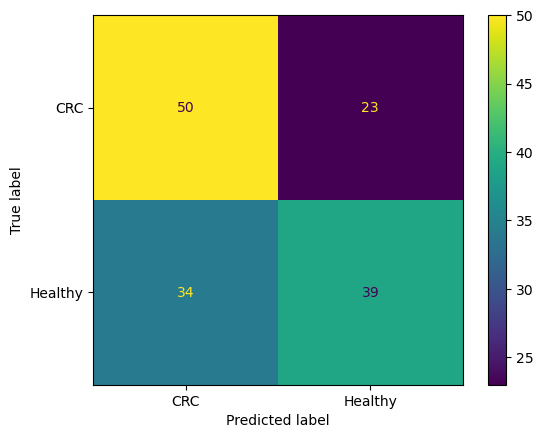

              precision    recall  f1-score   support

         CRC       0.60      0.68      0.64        73
     Healthy       0.63      0.53      0.58        73

    accuracy                           0.61       146
   macro avg       0.61      0.61      0.61       146
weighted avg       0.61      0.61      0.61       146



In [15]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)

# Define parameters for XGBoost model
params = {
    'max_depth': [3, 4, 5],
    'eta': [0.01, 0.1],
    'alpha': [1],
    'colsample_bytree': [0.8],
    'subsample': [0.8, 0.9],
    'n_estimators':[100],
}

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', seed=42)

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter set selection
grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, scoring='accuracy', cv=cv)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Evaluate on test set
test_score = grid_search.best_estimator_.score(X_test, y_test)
print("Test Set Accuracy:", test_score)

y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['CRC', 'Healthy'])
plt.figure(figsize=(8, 6))
cm_display.plot()
plt.show()

# Calculate precision, recall, and F1-score
report = classification_report(y_test, y_pred, target_names=['CRC', 'Healthy'])
print(report)

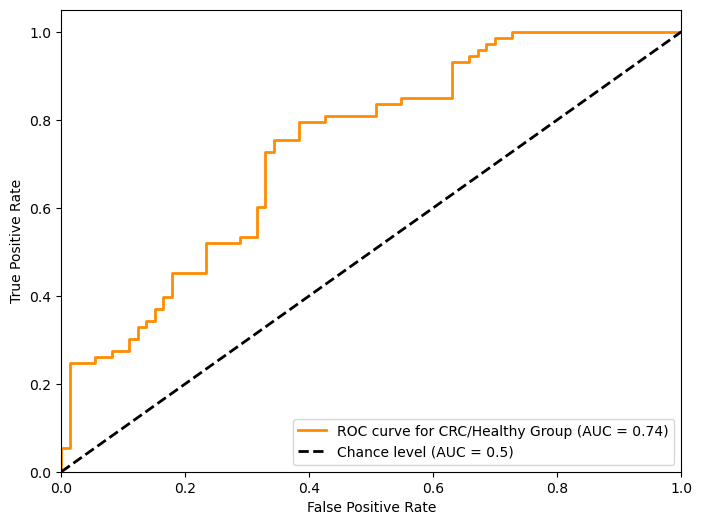

In [16]:
# AUROC curve

y_prob = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve for CRC/Healthy Group (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, label=f'Chance level (AUC = 0.5)', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

C:\Users\Zhongyuan\AppData\Local\Temp\ipykernel_29360\3155538048.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[top_20_indices], y=top_20_feature_names, palette="viridis")


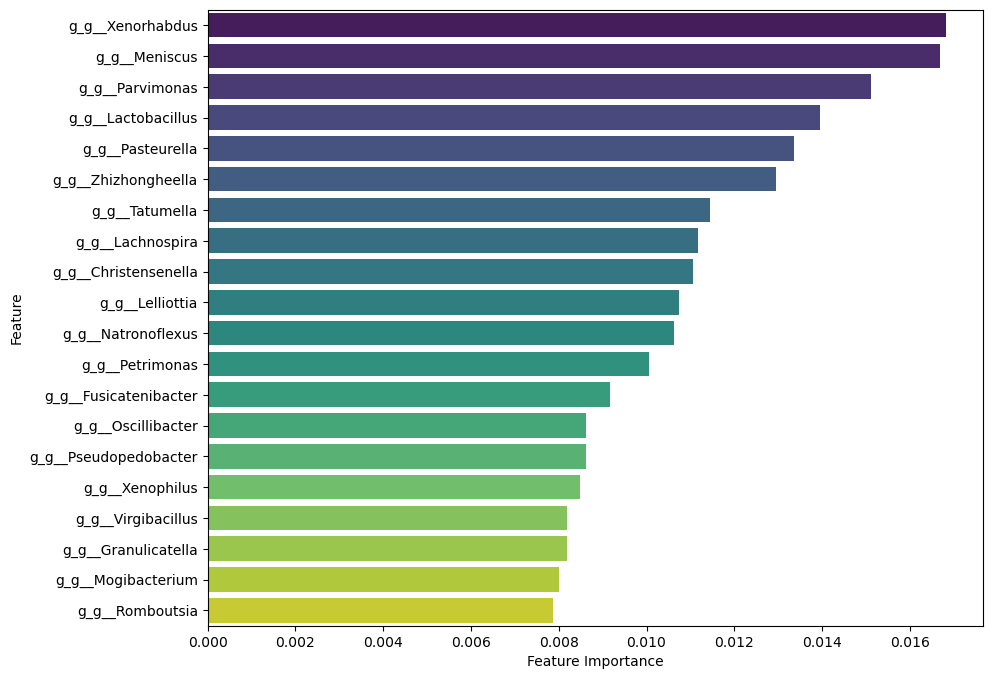

In [17]:
# Train XGBoost model with best parameters for calculating feature importances
best_xgb_model = xgb.XGBClassifier(objective='binary:logistic',eval_metric='logloss', **best_params)
best_xgb_model.fit(X_train, y_train)

feature_importances = best_xgb_model.feature_importances_
top_20_indices = feature_importances.argsort()[::-1][:20]
feature_names = X.columns

# Add the prefix "g_" to the top 20 feature names
top_20_feature_names = ["g_" + feature_names[i] for i in top_20_indices]

plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances[top_20_indices], y=top_20_feature_names, palette="viridis")
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

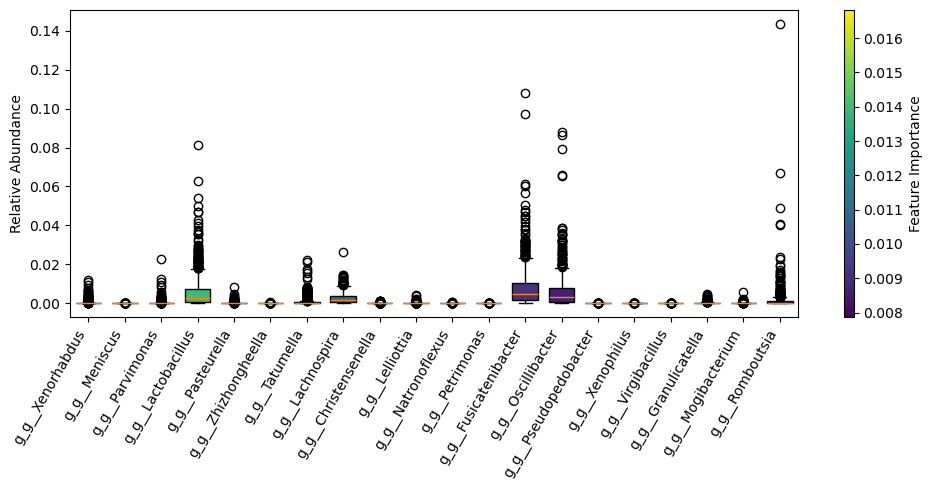

In [18]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Normalize feature importances
norm = Normalize(vmin=min(feature_importances[top_20_indices]), vmax=max(feature_importances[top_20_indices]))
cmap = plt.get_cmap('viridis')  # Choose a colormap
colors = [cmap(norm(importance)) for importance in feature_importances[top_20_indices]]

data = {}
scaled_X = np.log(X+1)

for original_name, prefixed_name in zip(X.columns[top_20_indices], top_20_feature_names):
    data[prefixed_name] = scaled_X[original_name]

fig, ax = plt.subplots(figsize=(10, 5))

# Plot each box with the corresponding color based on feature importance
for i, (key, value) in enumerate(data.items()):
    box = ax.boxplot(value, positions=[i + 1], widths=0.7, patch_artist=True,
                     boxprops=dict(facecolor=colors[i], color='black'),
                     whiskerprops=dict(color='black'))

ax.set_ylabel('Relative Abundance', fontsize=10)
ax.set_xticks(range(1, len(data) + 1))
ax.set_xticklabels(data.keys(), rotation=60, ha='right', fontsize=10)
plt.tight_layout()

# Add colorbar
sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Only needed for colorbar, not for plotting
cbar = plt.colorbar(sm, ax=ax, aspect=30)
cbar.set_label('Feature Importance', fontsize=10)

plt.show()

EMC_CanML:

In [19]:
# ML framework

from sklearn.metrics import precision_score, recall_score, f1_score

# Define parameters for XGB model
params = {
    'max_depth': [3, 4, 5],
    'eta': [0.01, 0.1],
    'alpha': [1], 
    'colsample_bytree': [0.8],
    'subsample': [0.8, 0.9],
    'n_estimators':[100],
}


xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', seed=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

n_iterations = 20
robustness_train_scores = []
robustness_test_scores = []
robustness_auroc = []
precision_scores = []
recall_scores = []
f1_scores = []
important_features = []

for i in range(n_iterations):
 
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=True, random_state=i, stratify=y)

    grid_search = GridSearchCV(estimator=xgb_model, param_grid=params, scoring='accuracy', cv=cv)
    grid_search.fit(X_train, y_train)

    # Evaluate the model on the training data of the resampled set
    train_score = grid_search.best_score_
    robustness_train_scores.append(train_score)

    # Evaluate the model on the test data of the resampled set
    y_pred = grid_search.best_estimator_.predict(X_test)
    test_score = accuracy_score(y_test, y_pred)
    robustness_test_scores.append(test_score)
    
    # Calculate AUROC score
    y_test_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
    test_auroc = roc_auc_score(y_test, y_test_proba)
    robustness_auroc.append(test_auroc)

    # Calculate precision, recall, and F1 score
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Extract the best model's parameters and feature importances
    best_params = grid_search.best_params_
    best_xgb_model = xgb.XGBClassifier(objective='binary:logistic',eval_metric='logloss', **best_params)
    best_xgb_model.fit(X_train, y_train)

    feature_importances = best_xgb_model.feature_importances_
    top_20_indices = feature_importances.argsort()[::-1][:20]
    feature_names = X.columns
    top_20_features = feature_names[top_20_indices]
    important_features.extend(top_20_features)


robustness_train_mean = np.mean(robustness_train_scores)
robustness_train_std = np.std(robustness_train_scores)

robustness_test_mean = np.mean(robustness_test_scores)
robustness_test_std = np.std(robustness_test_scores)

robustness_auroc_mean = np.mean(robustness_auroc)
robustness_auroc_std = np.std(robustness_auroc)

# Calculate mean and standard deviation for precision, recall, and F1 score
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)

print("Train Mean Accuracy:", robustness_train_mean)
print("Train Std Accuracy:", robustness_train_std)
print("Test Mean Accuracy:", robustness_test_mean)
print("Test Std Accuracy:", robustness_test_std)
print("Mean AUROC:", robustness_auroc_mean)
print("Std AUROC:", robustness_auroc_std)
print("Mean Precision:", mean_precision)
print("Std Precision:", std_precision)
print("Mean Recall:", mean_recall)
print("Std Recall:", std_recall)
print("Mean F1 Score:", mean_f1)
print("Std F1 Score:", std_f1)


Train Mean Accuracy: 0.7024027409372237
Train Std Accuracy: 0.012946044940306831
Test Mean Accuracy: 0.6832191780821917
Test Std Accuracy: 0.031601629327744095
Mean AUROC: 0.7615312441358604
Std AUROC: 0.029850111071726623
Mean Precision: 0.6787146582472016
Std Precision: 0.029400975012172707
Mean Recall: 0.6965753424657535
Std Recall: 0.057513858096522555
Mean F1 Score: 0.6864966313554705
Std F1 Score: 0.03800955200570021


In [20]:
print(f"Train_accuracy_scores: {robustness_train_scores}" )
print(f"Test_accuracy_scores: {robustness_test_scores}" )
print(f"AUROC_scores: {robustness_auroc}" )
print(f"precision_scores: {precision_scores}" )
print(f"recall_scores: {recall_scores}" )
print(f"f1_scores: {f1_scores}" )

Train_accuracy_scores: [0.7054671382257588, 0.7141173003241968, 0.6986000589448864, 0.6969348659003831, 0.7123784261715297, 0.6729590333038609, 0.6952991452991453, 0.7002947244326554, 0.7122310639552019, 0.6902151488358385, 0.7174034777483053, 0.7122458001768347, 0.697008547008547, 0.6969053934571176, 0.7089890951959917, 0.7106837606837606, 0.6969053934571176, 0.7088712054229297, 0.7259652225169467, 0.674580017683466]
Test_accuracy_scores: [0.6917808219178082, 0.7054794520547946, 0.6917808219178082, 0.7397260273972602, 0.684931506849315, 0.7123287671232876, 0.726027397260274, 0.684931506849315, 0.678082191780822, 0.6438356164383562, 0.6506849315068494, 0.684931506849315, 0.7123287671232876, 0.6301369863013698, 0.678082191780822, 0.636986301369863, 0.6917808219178082, 0.678082191780822, 0.6232876712328768, 0.7191780821917808]
AUROC_scores: [0.7571777068868456, 0.7746293863764308, 0.7757553011822106, 0.8022142991180333, 0.7524863951960967, 0.8085944830174517, 0.7592418840307749, 0.763933

In [21]:
# The list of important features
print("Total number of selected features:", len(important_features))
important_features = pd.DataFrame(important_features)
important_features.to_csv('FI_XGB_FMG_HC.csv', index=False)

Total number of selected features: 400
